In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
from sklearn.metrics import mean_squared_error
from statistics import mean
from typing import Dict, List, Tuple
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


2024-03-20 12:06:28.604096: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-20 12:06:29.663976: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-20 12:06:32.398041: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-20 12:06:35.684630: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:

class Neural:
    
    def __init__(self, layers, epochs, learning_rate=0.001, batch_size=32, validation_split=0.2, verbose=1):
        self._layer_structure = layers
        self._batch_size = batch_size
        self._epochs = epochs
        self._learning_rate = learning_rate
        self._validation_split = validation_split
        self._verbose = verbose
        self._losses = {"train": [], "validation": []}
        self._is_fit = False
        self.__layers = None
        
    def fit(self, X, y):
        X, X_val, y, y_val = train_test_split(X, y, test_size=self._validation_split, random_state=42)
        self.__layers = self.__init_layers()
        for epoch in range(self._epochs):
            epoch_losses = []
            for i in range(1, len(self.__layers)):
                x_batch = X[i:(i+self._batch_size)]
                y_batch = y[i:(i+self._batch_size)]
                pred, hidden = self.__forward(x_batch)
                loss = self.__calculate_loss(y_batch, pred)
                epoch_losses.append(np.mean(loss ** 2))
                self.__backward(hidden, loss)
            valid_preds, _ = self.__forward(X_val)
            train_loss = np.mean(epoch_losses)
            valid_loss = np.mean(self.__calculate_mse(valid_preds, y_val))
            self._losses["train"].append(train_loss)
            self._losses["validation"].append(valid_loss)
            if self._verbose:
                print(f"Epoch: {epoch} Train MSE: {train_loss} Valid MSE: {valid_loss}")
        self._is_fit = True
    
    def predict(self, X):
        if not self._is_fit:
            raise Exception("Model has not been trained yet.")
        pred, _ = self.__forward(X)
        return pred
    
    def plot_learning(self):
        plt.plot(self._losses["train"], label="Perdida")
        plt.plot(self._losses["validation"], label="validacion")
        plt.legend()
    
    def __init_layers(self):
        layers = []
        for i in range(1, len(self._layer_structure)):
            layers.append([
                np.random.rand(self._layer_structure[i-1], self._layer_structure[i]) / 5 - .1,
                np.ones((1, self._layer_structure[i]))
            ])
        return layers
    
    def __forward(self, batch):
        hidden = [batch.copy()]
        for i in range(len(self.__layers)):
            batch = np.matmul(batch, self.__layers[i][0]) + self.__layers[i][1]
            if i < len(self.__layers) - 1:
                batch = np.maximum(batch, 0)
            hidden.append(batch.copy())
        return batch, hidden
    
    def __calculate_loss(self, actual, predicted):
        return predicted - actual
    
    def __calculate_mse(self, actual, predicted):
        return (actual - predicted) ** 2
    
    def __backward(self, hidden, grad):
        for i in range(len(self.__layers)-1, -1, -1):
            if i != len(self.__layers) - 1:
                grad = np.multiply(grad, np.heaviside(hidden[i+1], 0))
    
            w_grad = hidden[i].T @ grad
            b_grad = np.mean(grad, axis=0)
    
            self.__layers[i][0] -= w_grad * self._learning_rate
            self.__layers[i][1] -= b_grad * self._learning_rate
            
            grad = grad @ self.__layers[i][0].T



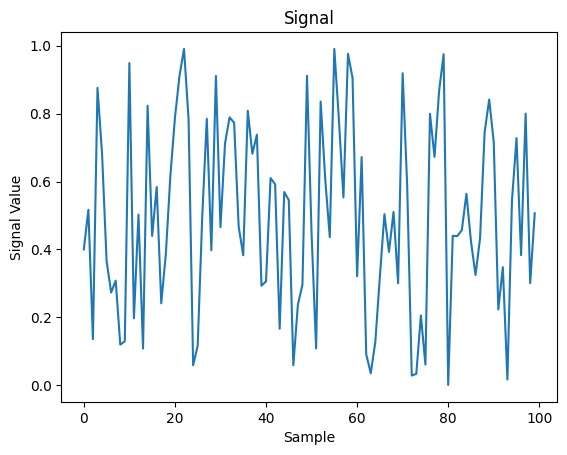

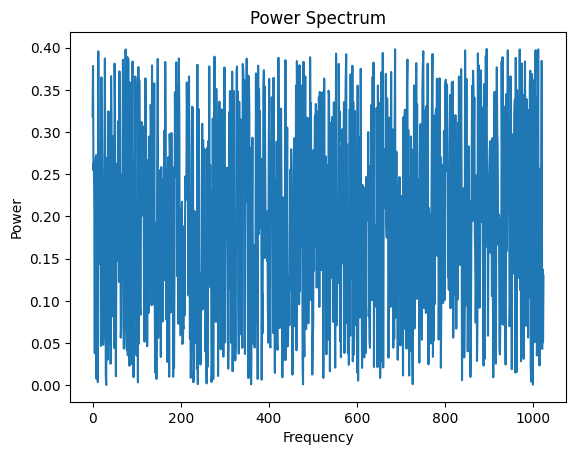

In [39]:
import numpy as np

# Define the number of training samples
num_samples = 100

# Reshape signal_values to (num_samples, 1)
signal_values = np.random.rand(num_samples).reshape(-1, 1)

# Now, you can multiply them
power_spectra = signal_values * np.random.rand(num_samples, 1025)

# Create the training data array
data = np.column_stack((signal_values, power_spectra))

import matplotlib.pyplot as plt

plt.plot(signal_values)
plt.xlabel('Sample')
plt.ylabel('Signal Value')
plt.title('Signal')
plt.show()


plt.plot(power_spectra[0])
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.title('Power Spectrum')
plt.show()


In [31]:
x = data[:, 1:]
y = data[:, 0]

print(x.shape, y.shape)

(100, 1025) (100,)


In [32]:
print (x)

[[0.01853902 0.05419349 0.0516153  ... 0.038573   0.18905805 0.03342859]
 [0.08323668 0.28307241 0.19817994 ... 0.10154131 0.0794713  0.02147996]
 [0.01914856 0.01560964 0.03287038 ... 0.03019649 0.02640171 0.01329221]
 ...
 [0.56341092 0.52563803 0.21338863 ... 0.28672644 0.40878914 0.17743158]
 [0.67445905 0.92918279 0.11835842 ... 0.7960206  0.57215032 0.73425836]
 [0.11330313 0.22934919 0.05566521 ... 0.25485066 0.38377984 0.09781602]]


In [33]:
print(y)

[0.20439074 0.34286764 0.03514763 0.67071965 0.85535674 0.6761627
 0.36198396 0.16240551 0.79490168 0.76161415 0.64659027 0.27658892
 0.42842482 0.94845324 0.80753612 0.89186973 0.06183628 0.39439272
 0.05937111 0.88532541 0.95536976 0.07231561 0.55743029 0.54868527
 0.25114277 0.72003354 0.13127038 0.53425267 0.66256516 0.41556393
 0.45231831 0.81196739 0.85148055 0.56892245 0.02125316 0.67910165
 0.4550097  0.74298643 0.35283111 0.00570854 0.14976224 0.88683772
 0.25489813 0.83714203 0.64809237 0.17382286 0.63509328 0.72171943
 0.91683581 0.03828433 0.18498542 0.97096568 0.05028584 0.2047359
 0.01235045 0.77725674 0.23775413 0.97823597 0.80921983 0.22053949
 0.16341515 0.71336342 0.52258217 0.74242977 0.79948205 0.65156631
 0.55557515 0.72370715 0.31544288 0.3925534  0.29304051 0.53085355
 0.4808869  0.64746783 0.85208475 0.60483764 0.06444303 0.34371006
 0.11580404 0.25277403 0.64748094 0.99127838 0.93102146 0.05291247
 0.53956945 0.99740995 0.04155328 0.46005605 0.6775213  0.758629

In [22]:
x = np.random.rand(num_samples)
y = np.random.rand(num_samples)

def generate_data():
    corr_a = 0.1
    corr_b= 0.2

    a =  x
    b = y

    target = corr_a * a + corr_b * b + np.random.normal(0, 0.1, size=num_samples)
    df = pd.DataFrame({'a': a, 'b': b, 'target': target})
    return df


print(x)

print(y)

[0.72455552 0.11448777 0.61115714 0.71981721 0.07265087 0.2173483
 0.57553581 0.77070081 0.33312085 0.4929554  0.73567295 0.79159486
 0.64485088 0.91733262 0.84577782 0.74765683 0.21705576 0.83741794
 0.63371561 0.50833803 0.13507197 0.77021604 0.05081662 0.3051733
 0.33848565 0.62354511 0.67662249 0.19986389 0.39038691 0.58617887
 0.96222231 0.12154881 0.01438136 0.93021047 0.14367229 0.69023628
 0.80327148 0.25170185 0.32195894 0.73164488 0.37419591 0.548969
 0.58865313 0.6312081  0.91353289 0.65657022 0.92283182 0.43262132
 0.50619159 0.8302184  0.33817725 0.58715799 0.76926693 0.26009799
 0.00719618 0.30163699 0.64648366 0.0990927  0.39589107 0.28920879
 0.82993875 0.1325988  0.1806546  0.4044316  0.14505843 0.25054549
 0.9875217  0.76508763 0.39534063 0.55679353 0.82944296 0.92227481
 0.1237095  0.35003052 0.70211329 0.77320579 0.92318683 0.53685482
 0.70745024 0.76918723 0.5704629  0.86511999 0.68085276 0.22059138
 0.6618542  0.53466969 0.84307397 0.67633585 0.62617069 0.69941913

Epoch: 0 Train MSE: 0.5078419518179834 Valid MSE: 0.5146554489983977
Epoch: 1 Train MSE: 0.4913785524049571 Valid MSE: 0.4982730738131851
Epoch: 2 Train MSE: 0.47545437393152856 Valid MSE: 0.48242222470026946
Epoch: 3 Train MSE: 0.4600516113986652 Valid MSE: 0.46708545560472936
Epoch: 4 Train MSE: 0.4451530842850697 Valid MSE: 0.45224592878126046
Epoch: 5 Train MSE: 0.430742211057873 Valid MSE: 0.4378873901535335
Epoch: 6 Train MSE: 0.41680298498460233 Valid MSE: 0.4239941459213664
Epoch: 7 Train MSE: 0.4033199511655124 Valid MSE: 0.41055104033859885
Epoch: 8 Train MSE: 0.3902781847110318 Valid MSE: 0.3975434345899309
Epoch: 9 Train MSE: 0.37766326999431865 Valid MSE: 0.3849571866999611
Epoch: 10 Train MSE: 0.3654612809137629 Valid MSE: 0.37277863241226156
Epoch: 11 Train MSE: 0.35365876210476177 Valid MSE: 0.3609945669805829
Epoch: 12 Train MSE: 0.3422427110442463 Valid MSE: 0.3495922278182367
Epoch: 13 Train MSE: 0.33120056099528344 Valid MSE: 0.33855927795534896
Epoch: 14 Train MSE:

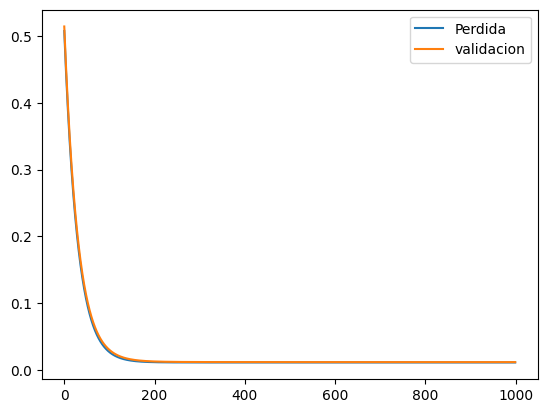

In [20]:
from sklearn.preprocessing import StandardScaler
df = generate_data()
x = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
x = scaler.fit_transform(x)


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)


layers_structure =[X_train.shape[1], 10, 10,1]
nn = Neural(layers_structure, 1000, 1e-5, 64, 0.2, 1)


nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)
nn.plot_learning()

print("Error de test: ", mean_squared_error(y_test, y_pred))





